# Indian Cities Network Analysis Part 1

In [5]:
! pip install networkit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 98.9 MB/s eta 0:00:00


## 1) Visualizing City Connectivity 


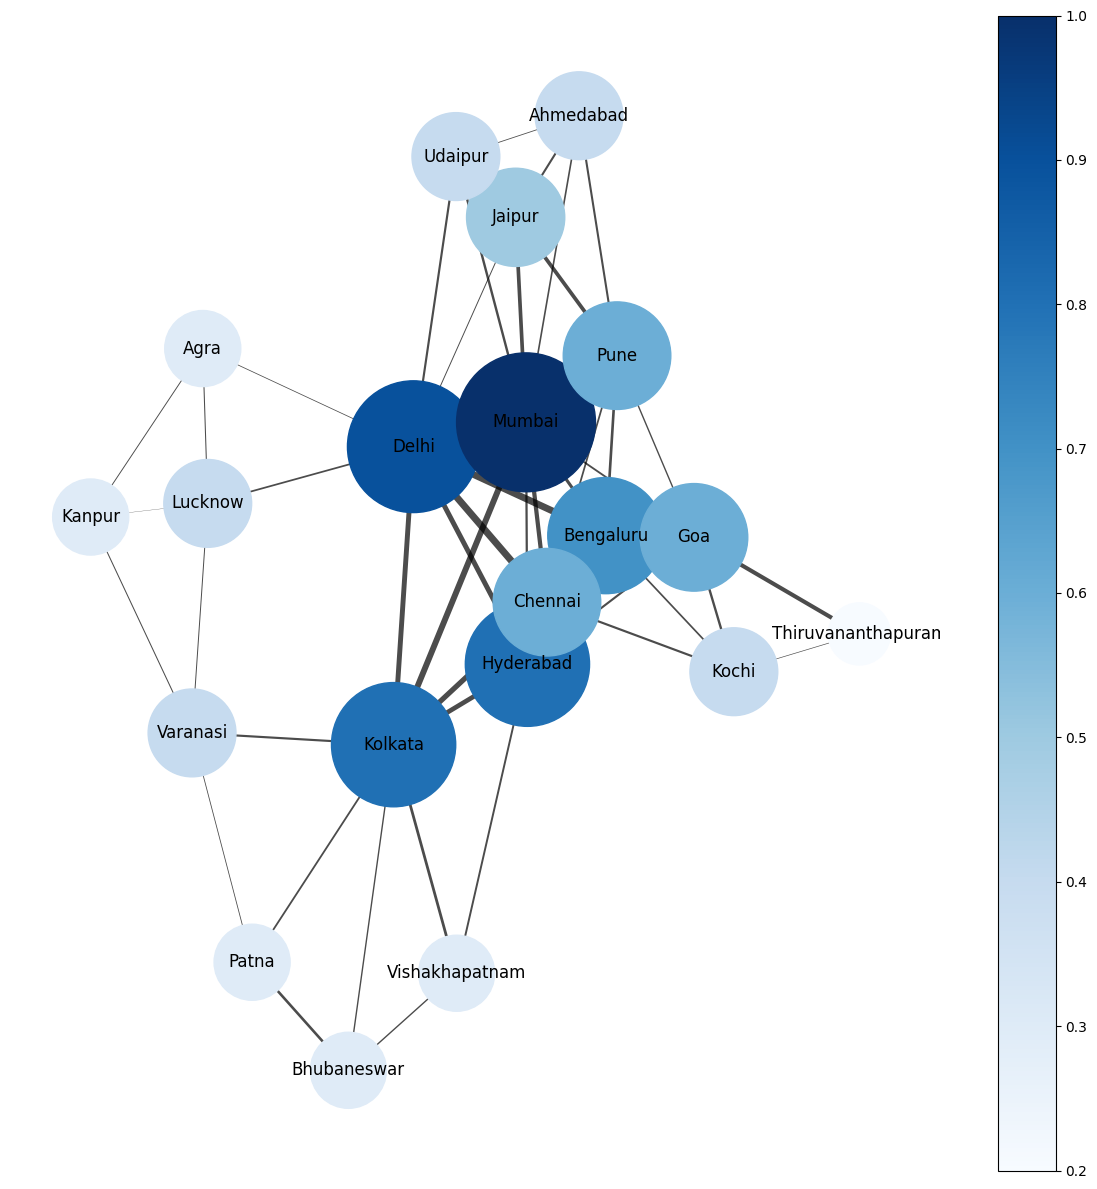

Top 10 nodes with the most connections: [('Mumbai', 10), ('Delhi', 9), ('Hyderabad', 8), ('Kolkata', 8), ('Bengaluru', 7), ('Pune', 6), ('Chennai', 6), ('Goa', 6), ('Jaipur', 5), ('Lucknow', 4)]


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("/home/paperspace/clinsight/backend/DEVELOPMENT/H_dev/Network_Measures/indian-cities-dataset.csv")

# Create a graph from the dataframe
G = nx.from_pandas_edgelist(df, 'Origin', 'Destination', ['Distance'])

# Calculate node degree and assign colors to nodes based on degree
degree_dict = dict(G.degree(G.nodes()))
node_degrees = np.array(list(degree_dict.values()))
node_colors = node_degrees / max(node_degrees)  # Normalize degree values for color


# Identify the cities with the most connections
# degree_dict = dict(G.degree(G.nodes()))
sorted_degree = sorted(degree_dict.items(), key=lambda item: item[1], reverse=True)


# Calculate edge widths based on 'Distance'
edge_widths = [G[u][v]['Distance'] / max([G[u][v]['Distance'] for u, v in G.edges()]) * 5 for u, v in G.edges()]

# Draw the graph
plt.figure(figsize=(15, 15))

# Positions for all nodes using spring layout,Position nodes using Fruchterman-Reingold force-directed algorithm

pos = nx.spring_layout(G, k=0.15, seed=42)
node_sizes = [v * 1000 for v in degree_dict.values()]

# Draw the nodes with color based on degree
# nodes = nx.draw_networkx_nodes(G, pos,node_size=700, node_color=node_colors, cmap=plt.cm.Blues)
nodes = nx.draw_networkx_nodes(G, pos,node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues)

# Draw the edges with width based on distance
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.7)

# Draw node labels, but only for top 10 nodes to reduce clutter
top_10_nodes = [node for node, degree in sorted_degree[:]]
labels = {node: node for node in top_10_nodes}  # Create a label dictionary for top 10 nodes
nx.draw_networkx_labels(G, pos, labels=labels, font_size=12, font_family='sans-serif')

# Add a color bar to represent node degree
plt.colorbar(nodes)  # Pass the nodes as the mappable to colorbar

plt.axis('off')
plt.show()

# Show top 10 cities with the most connections
sorted_degree[:10]
print("Top 10 nodes with the most connections:", sorted_degree[:10])



### Explanation
This code reads a dataset of Indian cities and their connections, then constructs a network graph where:

- Nodes represent cities.

- Edges represent connections between cities, weighted by distance.

- Node colors indicate connectivity.

- Edge thickness is proportional to the distance between cities.

- The top 10 most connected cities are labeled for clarity.

- The graph is displayed using a spring layout, ensuring better visualization of the network structure.

## 2)City Network Visualization with Node Scaling and Edge Weighting


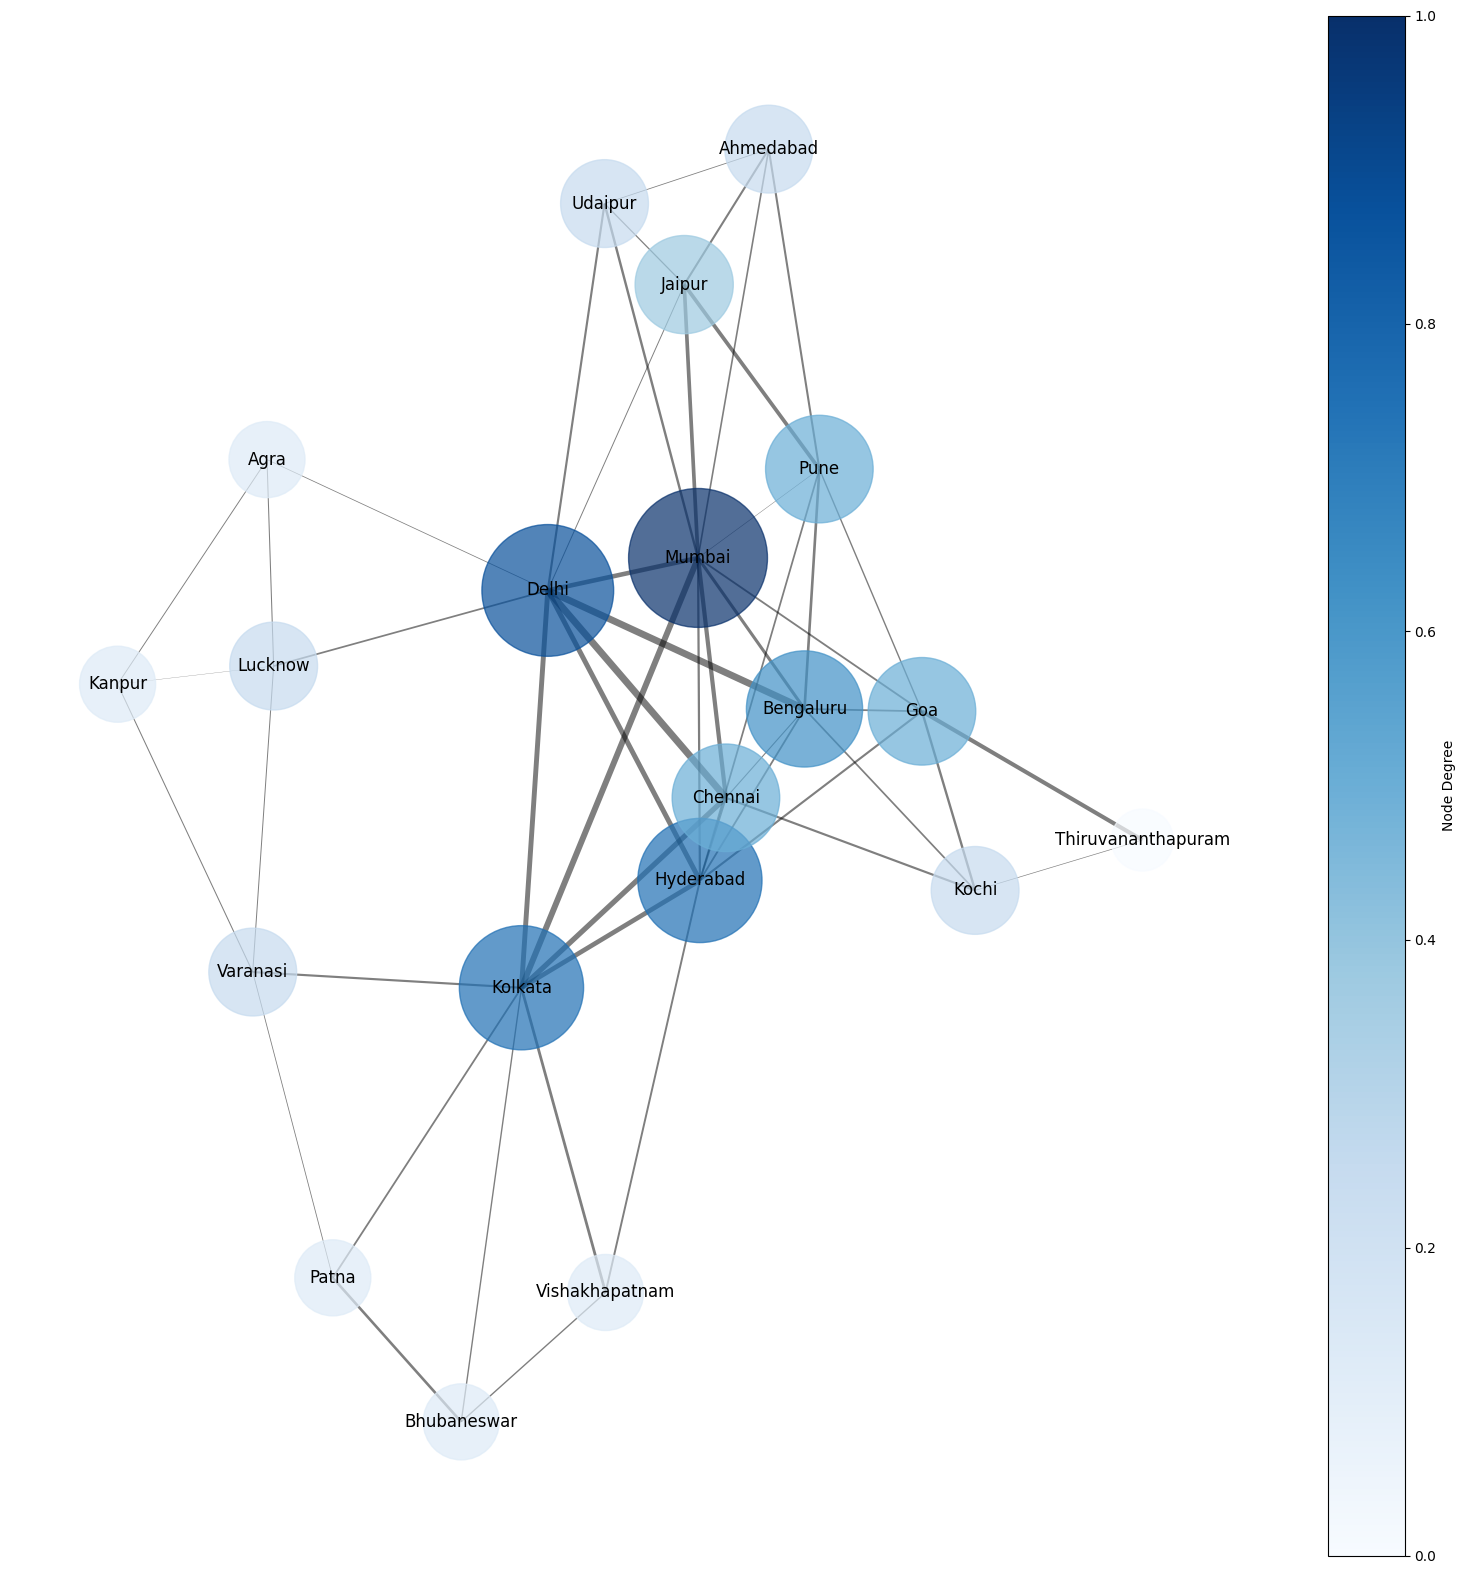

Top 10 nodes with the most connections: [('Mumbai', 10), ('Delhi', 9), ('Hyderabad', 8), ('Kolkata', 8), ('Bengaluru', 7), ('Pune', 6), ('Chennai', 6), ('Goa', 6), ('Jaipur', 5), ('Lucknow', 4)]


In [2]:
## 2)City Network Visualization with Node Scaling and Edge Weighting
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd

df = pd.read_csv("/home/paperspace/clinsight/backend/DEVELOPMENT/H_dev/Network_Measures/indian-cities-dataset.csv")

# Create a graph from the dataframe
G = nx.from_pandas_edgelist(df, 'Origin', 'Destination', ['Distance'])

# Calculate degree of each node
degree_dict = dict(G.degree())

# Determine node size by the number of connections (degree), scaled
node_sizes = [v * 1000 for v in degree_dict.values()]

# Normalize the degree for color mapping (from low to high)
node_color = np.array(list(degree_dict.values()))
node_color = (node_color - node_color.min()) / (node_color.max() - node_color.min())  # Normalize to [0, 1]

# Calculate edge width based on the distance (scaled, adjust this factor as needed)
max_distance = max([G[u][v]['Distance'] for u, v in G.edges()])
# edge_widths = [G[u][v]['Distance'] / max_distance * 2 for u, v in G.edges()]  # Reduced scaling factor
edge_widths = [G[u][v]['Distance'] / max([G[u][v]['Distance'] for u, v in G.edges()]) * 5 for u, v in G.edges()]

# Set up the figure size
plt.figure(figsize=(20, 20))

# Position nodes using Fruchterman-Reingold force-directed algorithm
pos = nx.spring_layout(G, k=0.15, seed=42)

# Draw nodes with size corresponding to degree, and color them by degree with a color map
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_color, cmap=plt.cm.Blues, alpha=0.7)

# Draw edges with width based on distance, and color them gray
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='black', alpha=0.5)

# Draw labels for each node with a larger font size and bold font
# nx.draw_networkx_labels(G, pos, font_size=15, font_weight='bold', font_color='darkblue')
nx.draw_networkx_labels(G, pos, labels=labels, font_size=12, font_family='sans-serif')

# Add a color bar to show the degree distribution
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=node_color.min(), vmax=node_color.max()))
sm.set_array([])

# Create a colorbar based on the mappable object
plt.colorbar(sm, ax=plt.gca(), label="Node Degree")

# Remove axis for a cleaner visualization
plt.axis('off')

# Show the graph
plt.show()

# Show top 10 nodes with the most connections
sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)
print("Top 10 nodes with the most connections:", sorted_degree[:10])


## 3) Community Detection in City Networks Using the Louvain Method


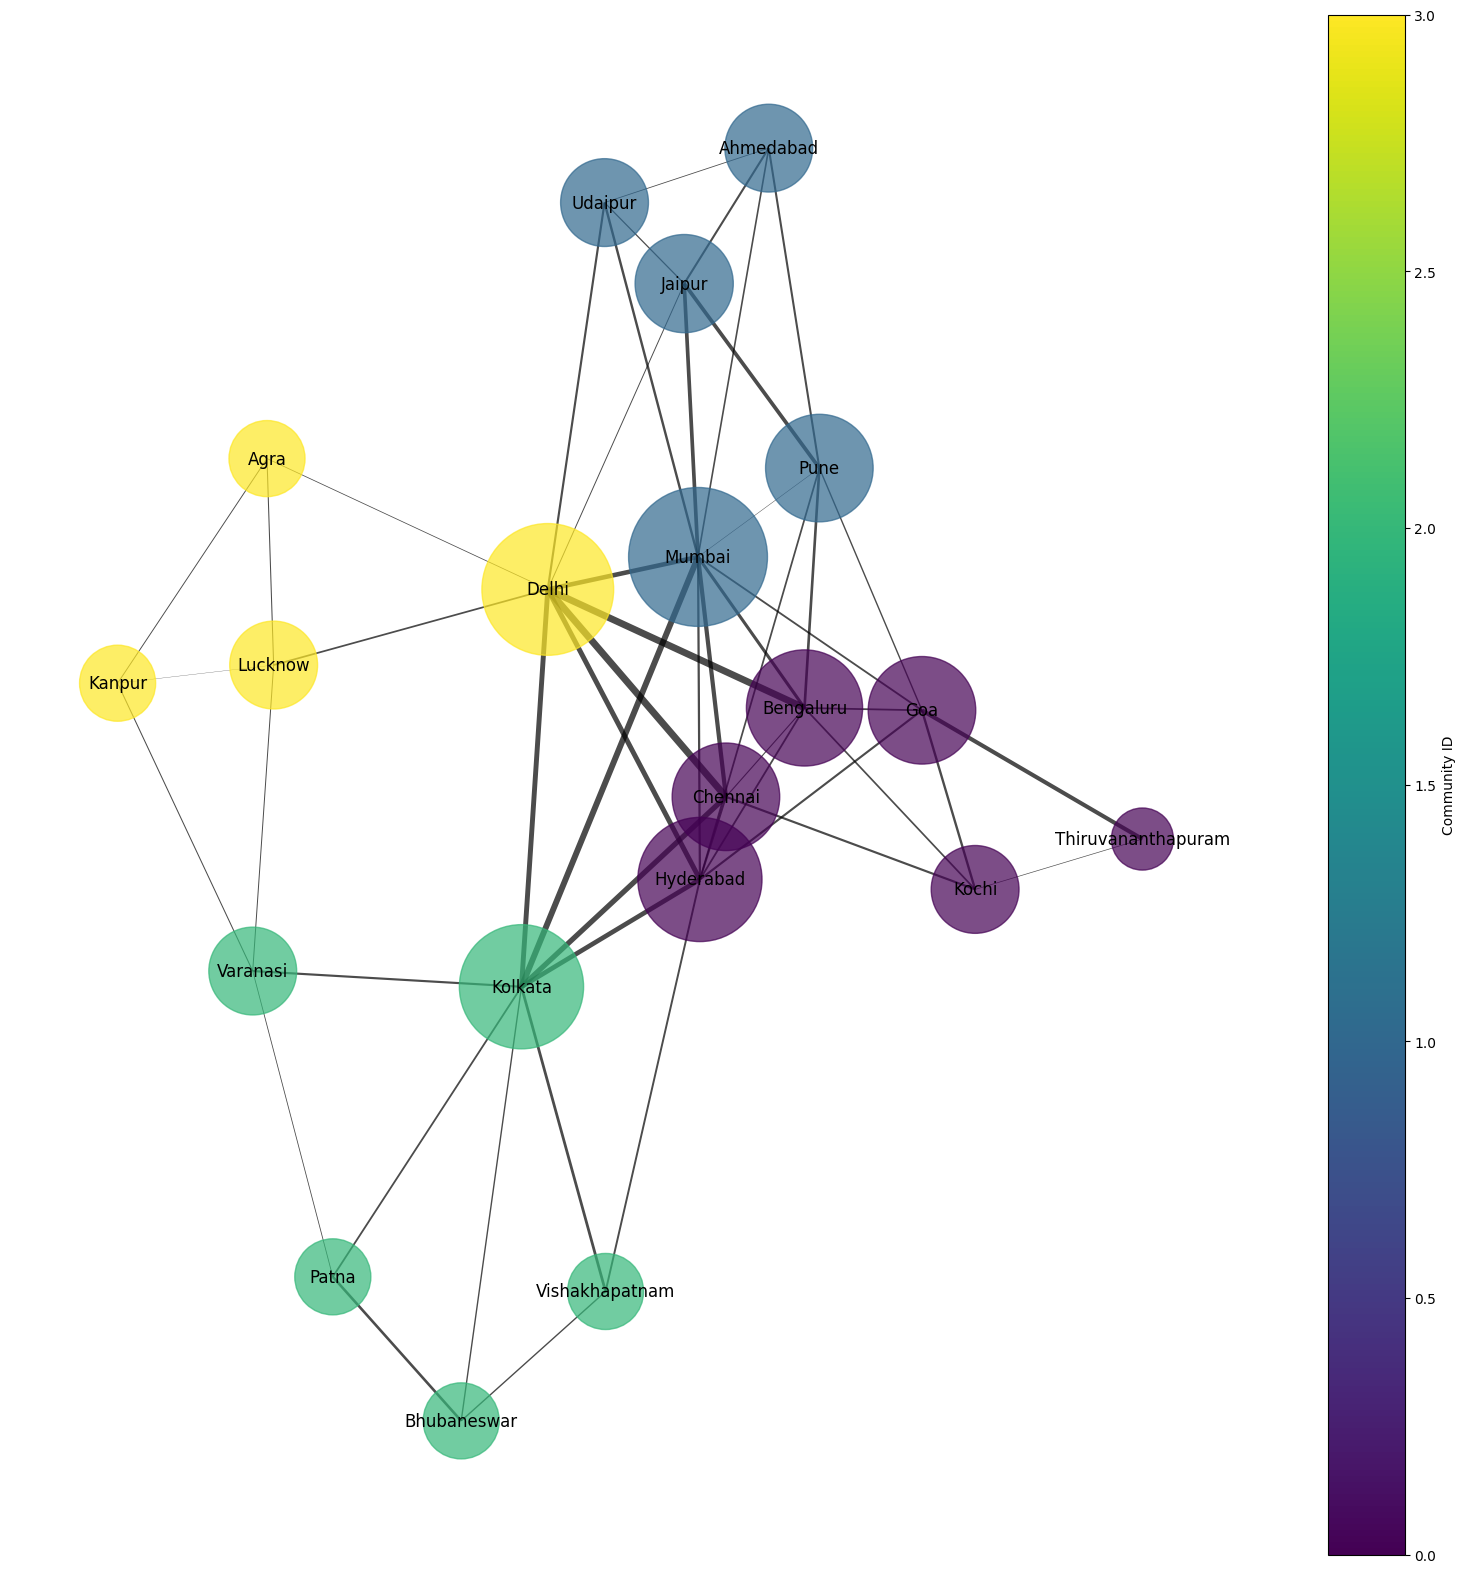

Top  Communities and their Sizes: {0: 6, 1: 5, 2: 5, 3: 4}


{0: ['Bengaluru',
  'Hyderabad',
  'Chennai',
  'Goa',
  'Kochi',
  'Thiruvananthapuram'],
 1: ['Ahmedabad', 'Mumbai', 'Pune', 'Jaipur', 'Udaipur'],
 2: ['Bhubaneswar', 'Kolkata', 'Vishakhapatnam', 'Patna', 'Varanasi'],
 3: ['Agra', 'Delhi', 'Lucknow', 'Kanpur']}

In [3]:
import community as community_louvain
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

df = pd.read_csv("/home/paperspace/clinsight/backend/DEVELOPMENT/H_dev/Network_Measures/indian-cities-dataset.csv")
G = nx.from_pandas_edgelist(df, 'Origin', 'Destination', ['Distance'])
degree_dict = dict(G.degree(G.nodes()))

# Perform community detection using the Louvain method
partition = community_louvain.best_partition(G)

# Visualization
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=0.15, seed=42)

# Color the nodes according to their partition
cmap = plt.colormaps['viridis']  # Updated for Matplotlib 3.7+
node_colors = [partition[node] for node in G.nodes()]

node_sizes = [v * 1000 for v in degree_dict.values()]

# Draw nodes with community-based color
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=cmap, node_color=node_colors, alpha=0.7)

# Draw edges with optional width based on 'Distance' or other attributes
edge_widths = [G[u][v]['Distance'] / max([G[u][v]['Distance'] for u, v in G.edges()]) * 5 for u, v in G.edges()]

nx.draw_networkx_edges(G, pos, width=edge_widths,edge_color='black',alpha=0.7)

# Draw labels, but only for the top 10 nodes to reduce clutter
top_10_nodes = sorted(partition, key=lambda x: partition[x], reverse=True)[:]
labels = {node: node for node in top_10_nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=12)
# nx.draw_networkx_labels(G, pos, labels=labels, font_size=12, font_family='sans-serif')

# Add a color bar for node partition visualization
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(partition.values()), vmax=max(partition.values())))
sm.set_array([])

# Use ax=plt.gca() to avoid colorbar placement errors
plt.colorbar(sm, ax=plt.gca(), label="Community ID")

# Remove axis for a cleaner visualization
plt.axis('off')
plt.show()

# Community analysis
communities = {}
for node, comm_id in partition.items():
    communities.setdefault(comm_id, []).append(node)

# Sort communities by size and show the top communities
sorted_communities = {k: v for k, v in sorted(communities.items(), key=lambda item: len(item[1]), reverse=True)}

# Show the top communities and their sizes
top_communities = {k: len(v) for k, v in list(sorted_communities.items())[:]}
print(f"Top  Communities and their Sizes: {top_communities}")

# Optionally display the entire sorted communities for further analysis
# Displaying the size of all communities sorted
sorted_communities


Modularity Score: 0.3453


/tmp/ipykernel_540315/2370227194.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Dark2", top_community)  # Use a distinct color for each community


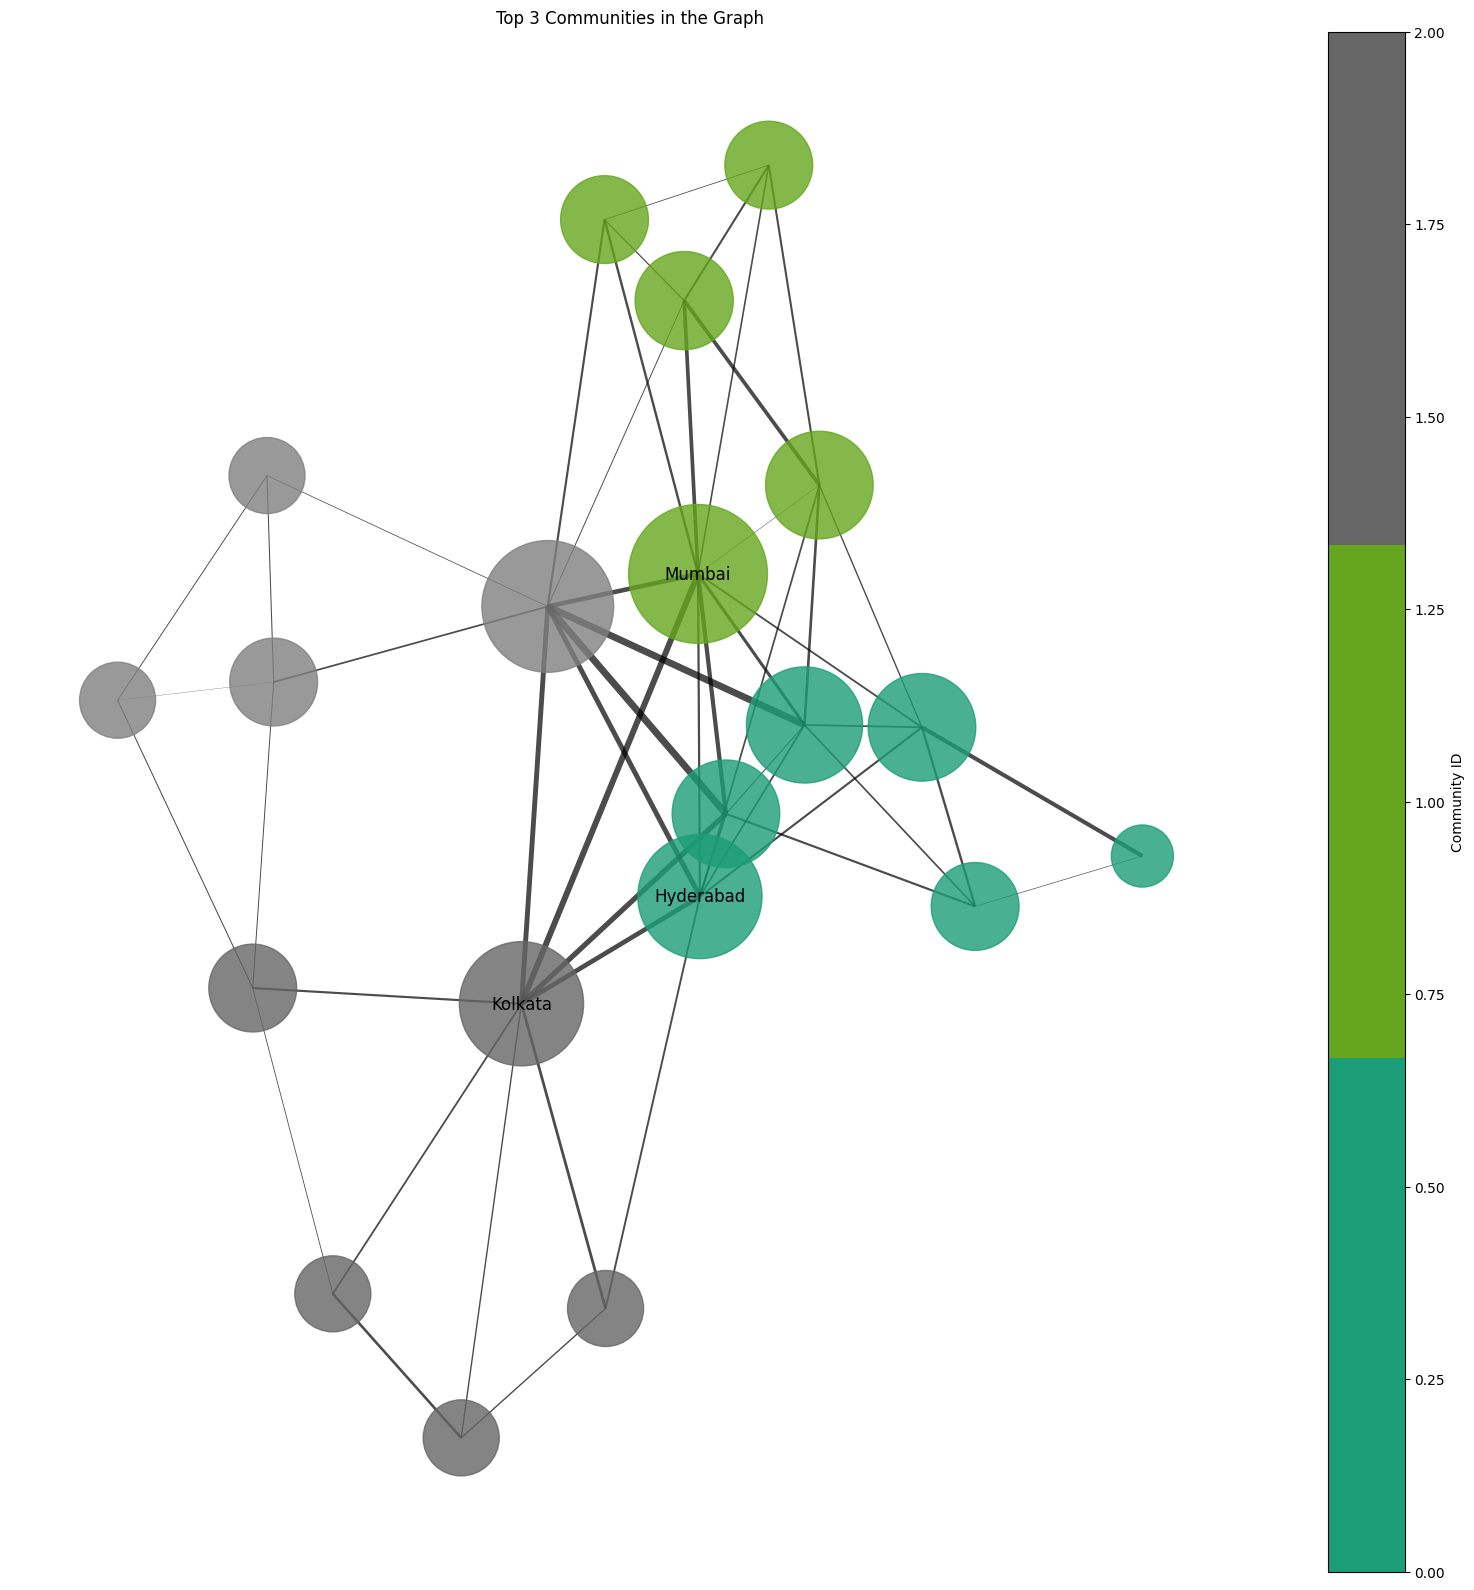

Top 3 Communities and their Sizes: {2: 6, 1: 5, 3: 5}


<Figure size 640x480 with 0 Axes>

In [4]:
import community as community_louvain
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

# Load dataset and create graph
df = pd.read_csv("/home/paperspace/clinsight/backend/DEVELOPMENT/H_dev/Network_Measures/indian-cities-dataset.csv")
G = nx.from_pandas_edgelist(df, 'Origin', 'Destination', ['Distance'])
degree_dict = dict(G.degree(G.nodes()))

# Perform community detection using the Louvain method
partition = community_louvain.best_partition(G)

# Define the number of top communities to visualize
top_community =3  # Change this value as needed (e.g., 3, 5, 7)

# Compute modularity score
modularity = community_louvain.modularity(partition, G)
print(f"Modularity Score: {modularity:.4f}")

# Organize nodes into communities
communities = {}
for node, comm_id in partition.items():
    communities.setdefault(comm_id, []).append(node)

# Sort communities by size (descending)
sorted_communities = sorted(communities.items(), key=lambda x: len(x[1]), reverse=True)

# Get top N communities
top_comm_ids = [comm_id for comm_id, nodes in sorted_communities[:top_community]]

# Assign colors dynamically
cmap = plt.cm.get_cmap("Dark2", top_community)  # Use a distinct color for each community

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=0.15, seed=42)

# Assign colors to nodes based on top communities
node_colors = []
for node in G.nodes():
    comm_id = partition[node]
    if comm_id in top_comm_ids:
        node_colors.append(cmap(top_comm_ids.index(comm_id)))
    else:
        node_colors.append("gray")  # Other communities in gray

# Scale node sizes based on degree
node_sizes = [v * 1000 for v in degree_dict.values()]

# Draw nodes with assigned colors
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)

# Edge width proportional to distance
max_distance = max([G[u][v]['Distance'] for u, v in G.edges()])
edge_widths = [G[u][v]['Distance'] / max_distance * 5 for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='black', alpha=0.7)

# Label only the most connected node in each top community
labels = {}
for comm_id in top_comm_ids:
    nodes_in_community = sorted(communities[comm_id], key=lambda x: degree_dict[x], reverse=True)
    labels[nodes_in_community[0]] = nodes_in_community[0]  # Label highest-degree node

nx.draw_networkx_labels(G, pos, labels=labels, font_size=12)
# nx.draw_networkx_labels(G, pos,font_size=12)

# Add colorbar for communities
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=top_community - 1))
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label="Community ID")

# Remove axis and show plot
plt.axis('off')
plt.title(f"Top {top_community} Communities in the Graph")
plt.show()

# Save the plot as an image file
plt.savefig("top_communities_graph.png", dpi=300)

# Print top communities and their sizes
top_communities = {comm_id: len(nodes) for comm_id, nodes in sorted_communities[:top_community]}
print(f"Top {top_community} Communities and their Sizes: {top_communities}")
# sorted_communities




### Explanation
This script is to detects,visualizes communities in thecity network using the Louvain method, which clusters cities based on their connectivity. It calculates modularity to measure the quality of detected communities and highlights the top N largest communities with distinct colors.But smaller ones remain gray.

## 4)Shortest Path Analysis in Indian Cities Network


/home/paperspace/anaconda3/envs/doc_env/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


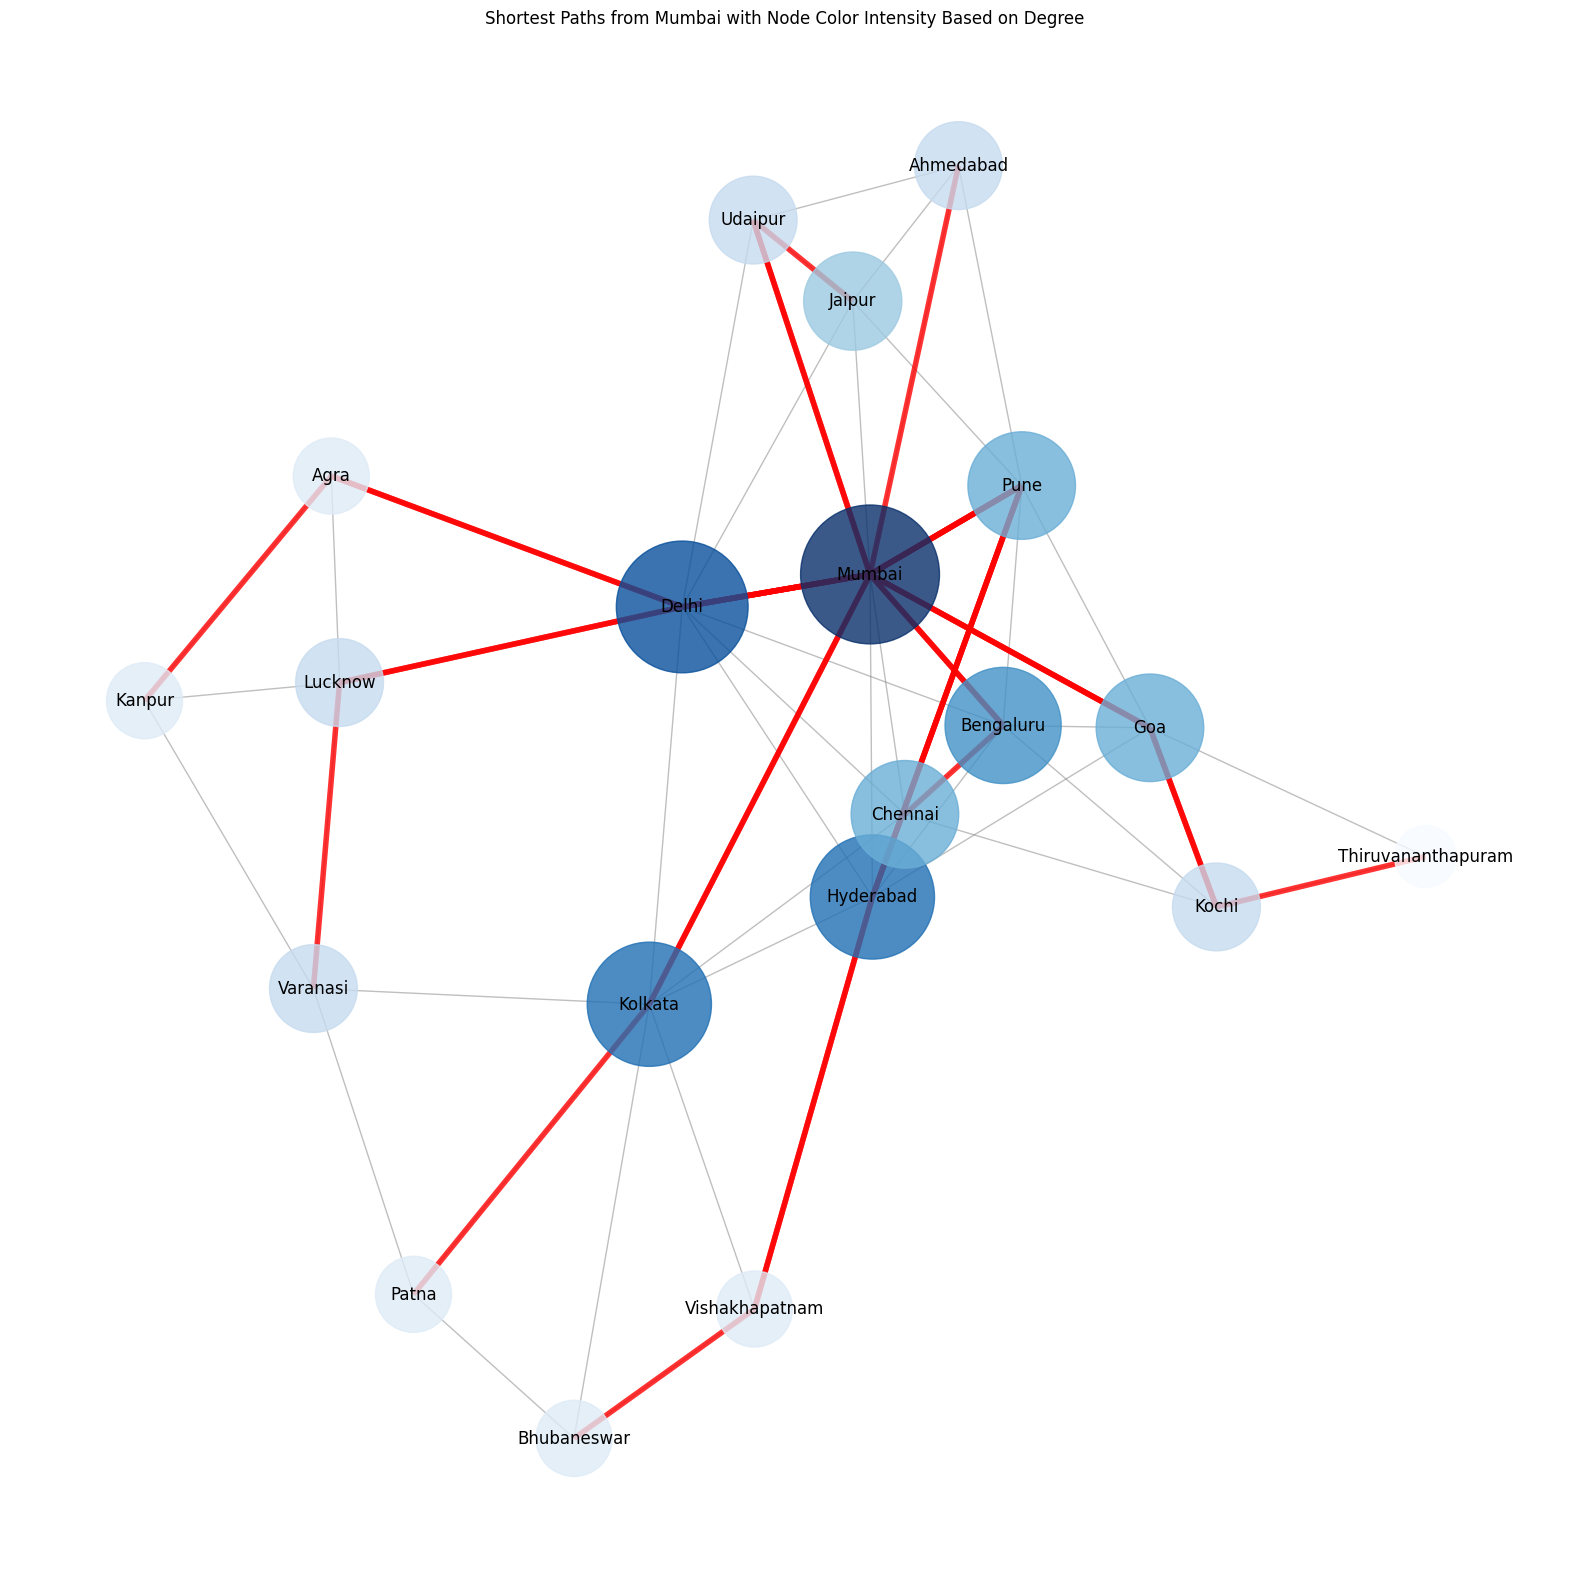

{'Mumbai': ['Mumbai'],
 'Ahmedabad': ['Mumbai', 'Ahmedabad'],
 'Chennai': ['Mumbai', 'Bengaluru', 'Chennai'],
 'Delhi': ['Mumbai', 'Delhi'],
 'Goa': ['Mumbai', 'Goa'],
 'Hyderabad': ['Mumbai', 'Pune', 'Hyderabad'],
 'Jaipur': ['Mumbai', 'Udaipur', 'Jaipur'],
 'Pune': ['Mumbai', 'Pune'],
 'Bengaluru': ['Mumbai', 'Bengaluru'],
 'Kolkata': ['Mumbai', 'Kolkata'],
 'Udaipur': ['Mumbai', 'Udaipur'],
 'Kochi': ['Mumbai', 'Goa', 'Kochi'],
 'Thiruvananthapuram': ['Mumbai', 'Goa', 'Kochi', 'Thiruvananthapuram'],
 'Vishakhapatnam': ['Mumbai', 'Pune', 'Hyderabad', 'Vishakhapatnam'],
 'Bhubaneswar': ['Mumbai',
  'Pune',
  'Hyderabad',
  'Vishakhapatnam',
  'Bhubaneswar'],
 'Agra': ['Mumbai', 'Delhi', 'Agra'],
 'Lucknow': ['Mumbai', 'Delhi', 'Lucknow'],
 'Kanpur': ['Mumbai', 'Delhi', 'Agra', 'Kanpur'],
 'Patna': ['Mumbai', 'Kolkata', 'Patna'],
 'Varanasi': ['Mumbai', 'Delhi', 'Lucknow', 'Varanasi']}

In [5]:
import community as community_louvain
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

# Load dataset and create graph
df = pd.read_csv("/home/paperspace/clinsight/backend/DEVELOPMENT/H_dev/Network_Measures/indian-cities-dataset.csv")
G = nx.from_pandas_edgelist(df, 'Origin', 'Destination', ['Distance'])

# Compute node degrees and scale sizes
degree_dict = dict(G.degree(G.nodes()))
node_sizes = [v * 1000 for v in degree_dict.values()]

# Normalize degrees for color intensity
degree_values = np.array(list(degree_dict.values()))
norm = plt.Normalize(degree_values.min(), degree_values.max())
node_colors = plt.cm.Blues(norm(degree_values))

# Compute all pairs shortest paths
all_pairs_shortest_paths = dict(nx.all_pairs_dijkstra_path(G, weight='Distance'))

# For the sake of visualization, let's just take a subset (e.g., paths originating from 'Mumbai')
subset_shortest_paths = {source: paths for source, paths in all_pairs_shortest_paths.items() if source == 'Mumbai'}

# Visualization
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=0.15, seed=42)

# Draw all nodes and edges
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.8, cmap=plt.cm.Blues)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12)
# nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')


# Highlight the paths from 'Mumbai' to all other cities
for destination, path in subset_shortest_paths['Mumbai'].items():
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=4, alpha=0.8)
plt.axis('off')
plt.title("Shortest Paths from Mumbai with Node Color Intensity Based on Degree")
plt.show()
subset_shortest_paths['Mumbai']

### Explanation
Dijkstra’s Algorithm (nx.all_pairs_dijkstra_path()) is used to compute the shortest paths between all city pairs based on distance.A subset of paths originating from ‘Mumbai’ is extracted for better visualization.